# `53-Logistic Regression Diabetes`

# 1. Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Get the Data

In [3]:
db = pd.read_csv('diabetes.csv')

In [4]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
db.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3. Exploring Data Insights

In [9]:
sns.set_palette("rainbow")
sns.set_style("whitegrid")

<Axes: >

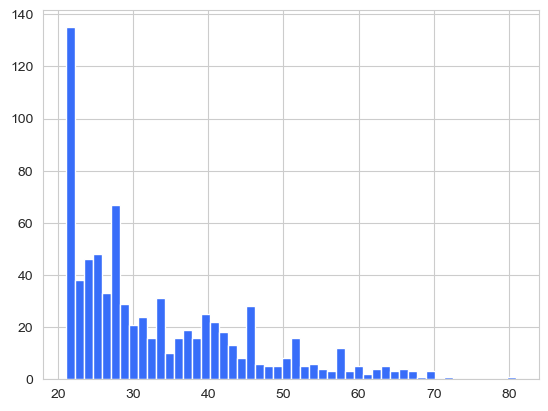

In [10]:
db['Age'].hist(bins=50)

<Axes: >

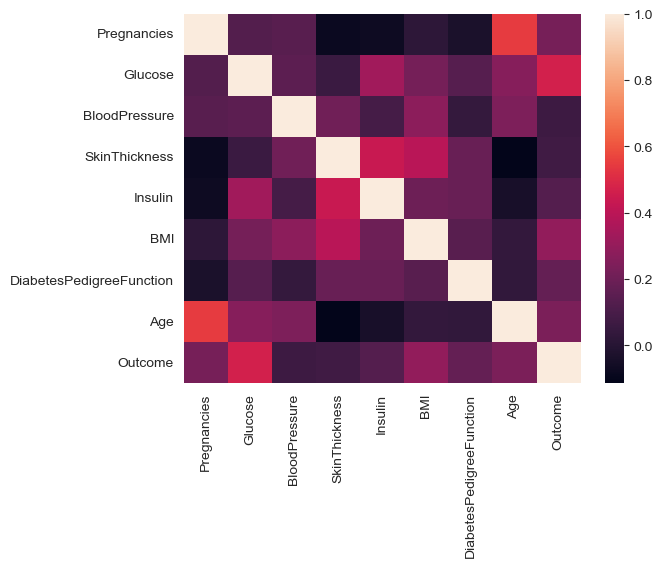

In [19]:
sns.heatmap(db.corr())

# 4. Training and Testing Data

In [22]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
X = db.drop('Outcome', axis=1)
y = db['Outcome']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

### Training Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test)

# 5. Evaluating Model

In [38]:
from sklearn import metrics

In [40]:
print("Accuracy: ", metrics.accuracy_score(y_test , y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

Accuracy:  0.8181818181818182

Confusion Matrix:
 [[140  12]
 [ 30  49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       152
           1       0.80      0.62      0.70        79

    accuracy                           0.82       231
   macro avg       0.81      0.77      0.78       231
weighted avg       0.82      0.82      0.81       231



# 6. Predict New Data

In [45]:
new_patient = pd.DataFrame({
    'Pregnancies': [3.845052],
    'Glucose': [100.894531],
    'BloodPressure': [69.105469],
    'SkinThickness': [20.536458],
    'Insulin': [115.244002],
    'BMI': [31.992578], 
    'DiabetesPedigreeFunction': [0.471876], 
    'Age': [50]
})

predict_outcome = model.predict(new_patient)
print("Patient has Diabetes: ", "Yes" if predict_outcome[0]==1 else "No")

Patient has Diabetes:  No
